# Numerical Simulation Laboratory

# Numerical exercise 6 

## Exercise 06.1
Simulazione del modello di Ising monodimensionale utilizzando gli algoritmi di Metropolis e di Gibbs. Il programma e i seguenti risultati sono stati prodotti assumendo le unità  $\mu_B=1$ and $k_B=1$.

In [1]:
import math
import numpy as np
#Risultati analitici in funzione della Temperatura
T = np.linspace(0.5, 2.0, 100)
beta = 1/T
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field

#energia
e = -J*( th + ch*thN )/( 1 + thN )
#capacità termica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#susciettività
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#magnetizzazione
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

### <font color=red> Equilibrazione </font>
La prima fase della simulazione consiste nell'equilibrazione del sistema a partire da una temperatura infinita, corrispondente ad un sistema disordinato in cui ogni spin ha la stessa probabilità di essere rivolto verso l'alto o verso il basso, fino al raggiungimento della temperatura $T=2.0$. A partire quindi da una configurazione generata casualmente con tali probabilità, rilancio il programma più volte finchè l'energia oscilla intorno ad un valore costante. Per ogni rilancio utilizzo un solo blocco e $200$ step Montecarlo. Per entrambi gli algoritmi si può osservare che il sistema risulta equilibrato già dopo pochi passi e, dopo una caduta iniziale, l'energia interna comincia sin da subito ad oscillare intorno al valore analitico $\frac{U}{N}=-0.46$ corrispondente alla temperatura di equilibrazione.

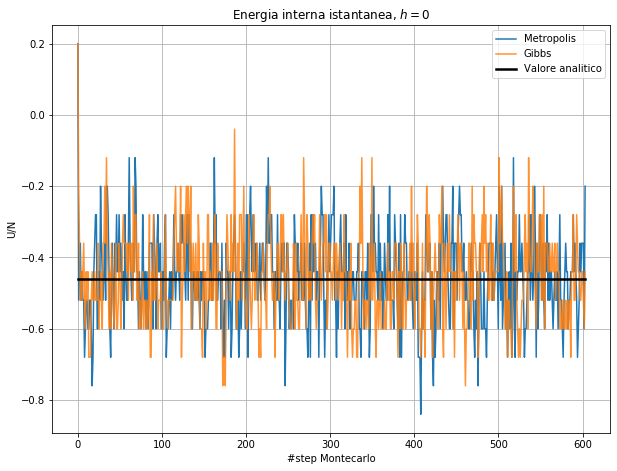

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

nstep = np.linspace(0, 603, 603)

plt.figure(figsize=(10, 7.5))
Um = np.loadtxt('Files/ist_ene_metro.out', delimiter='  ', unpack=True) #metropolis
Ug = np.loadtxt('Files/ist_ene_Gibbs.out', delimiter='  ', unpack=True) #metropolis
Uf = -0.46*nstep**0

plt.plot(nstep, Um, label='Metropolis') #metropolis
plt.plot(nstep, Ug, label='Gibbs', alpha=0.85) #Gibbs
plt.plot(nstep, Uf, label='Valore analitico', color='black', linewidth=2.5)

plt.title('Energia interna istantanea, $h=0$')
plt.xlabel('#step Montecarlo')
plt.ylabel('U/N')
plt.legend()
plt.grid(True)
plt.show()

### <font color=red> Simulazione</font>
A partire dalle configurazioni precedentemente riequilibrate effettuo la simulazione vera e propria stimando le grandezze termodinamiche in funzione della temperatura del sistema e utilizzando il metodo delle **medie a blocchi** per stimare i valori medi e le incertezze a temperatura fissata. In particolare per ogni temperatura  ho utilizzato $20$ blocchi con $10^4$ step ciascuno per un totale di $2 \times 10^5$ step in ogni calcolo.
I grafici seguenti mostrano i risultati ottenuti in funzione della temperatura nell'intervallo $[0.5,2.0]$. Per ogni temperatura i valori riportati corrispondono alla media effettuata su tutti i $20$ blocchi con le rispettive incertezze statistiche calcolate tramite data blocking.

### <font color=blue> Energia interna </font>
In ogni step Montecarlo, consistente nel tentativo di girare una volta ogni spin del sistema, calcolo l'energia interna istantanea tramite la seguente equazione
    $$ U(N,T) = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) \,,$$
e determino i valori medi e le incertezze statistiche su ciascun blocco per ogni valore della temperatura in input al programma.
Riporto qui il grafico dell'energia interna per spin ottenuto tramite gli algoritmi di Metropolis e di Gibbs in assenza di campo esterno $h=0$. I risultati ottenuti sono perfettamente coincidenti tra loro e con il risultato analitico e, utilizzando $2 \times 10^5$ step in ogni calcolo, le incertezze risultano estremamente piccole.

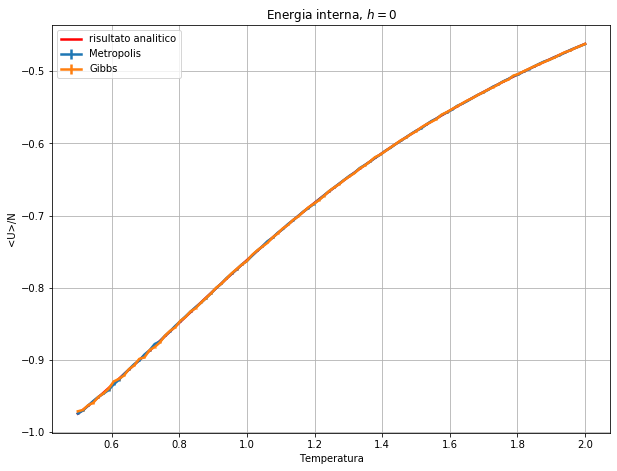

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, U, Uerr = np.loadtxt('Files/Ene_metro.out', delimiter='  ', unpack=True) #metropolis
temp, UG, UGerr = np.loadtxt('Files/Ene_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, e, color='red', label='risultato analitico', linewidth=2.5)
plt.errorbar(temp, U, yerr=Uerr, label='Metropolis', linewidth=2.5)  #metropolis
plt.errorbar(temp, UG, yerr=UGerr, label='Gibbs', linewidth=2.5) #Gibbs

plt.title('Energia interna, $h=0$')
plt.xlabel('Temperatura')
plt.ylabel('<U>/N')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Capacità termica </font>
In ogni step Montecarlo calcolo la capacità termica istantanea del sistema tramite la seguente equazione
    $$ C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2) \,,$$ 
e determino i valori medi e le incertezze statistiche su ciascun blocco per ogni valore della temperatura in input al programma.
Riporto qui il grafico della capacità termica del sistema ottenuto tramite gli algoritmi di Metropolis e di Gibbs in assenza di campo esterno $h=0$. I risultati ottenuti con i due metodi coincidono ma si discostano leggermente dal risultato analitico: e, come nel caso precedente, le incertezze sono molto piccole grazie al grande numero di step Montecarlo effettuati in ogni calcolo.

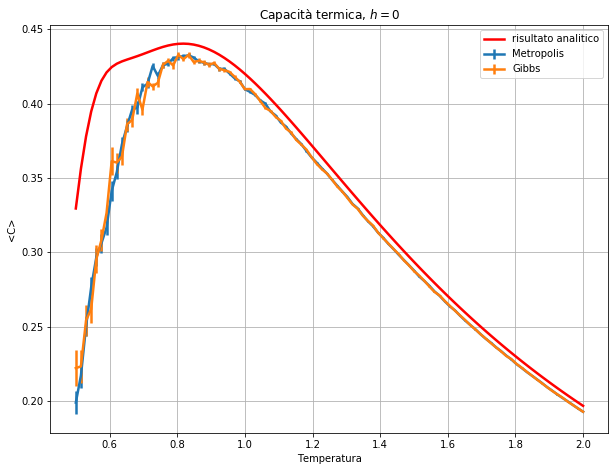

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, C, Cerr = np.loadtxt('Files/Heat_metro.out', delimiter='  ', unpack=True) #metropolis
temp, CG, CGerr = np.loadtxt('Files/Heat_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, heat, color='red', label='risultato analitico', linewidth=2.5)
plt.errorbar(temp, C, yerr=Cerr, label='Metropolis', linewidth=2.5) #metropolis
plt.errorbar(temp, CG, yerr=CGerr, label='Gibbs', linewidth=2.5)  #Gibbs

plt.title('Capacità termica, $h=0$')
plt.xlabel('Temperatura')
plt.ylabel('<C>')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Suscettività Magnetica </font>
In ogni step Montecarlo calcolo la suscettività magnetica istantanea del sistema tramite la seguente equazione
    $$ \chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0} \,,$$
e determino i valori medi e le incertezze statistiche su ciascun blocco per ogni valore della temperatura in input al programma.
Riporto qui il grafico della suscettività magnetica per spin ottenuto tramite gli algoritmi di Metropolis e di Gibbs in assenza di campo esterno $h=0$. I risultati ottenuti sono perfettamente coincidenti tra loro e con il risultato analitico e, utilizzando $2 \times 10^5$ step in ogni calcolo, le incertezze risultano estremamente piccole.

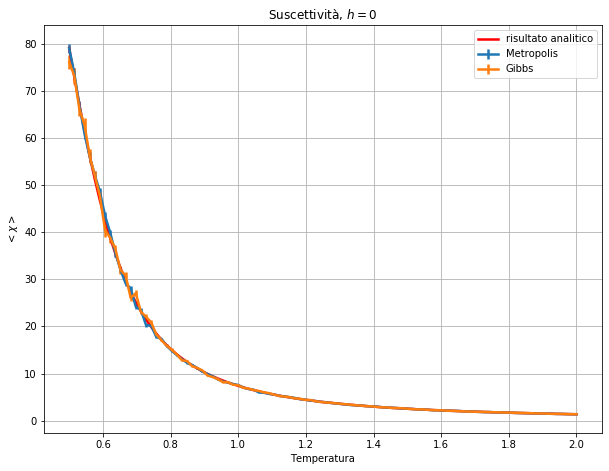

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, chi, chierr = np.loadtxt('Files/Chi_metro.out', delimiter='  ', unpack=True) #metropolis
temp, chiG, chiGerr = np.loadtxt('Files/Chi_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, X, color='red', label='risultato analitico', linewidth=2.5)
plt.errorbar(temp, chi, yerr=chierr, label='Metropolis', linewidth=2.5) #metropolis
plt.errorbar(temp, chiG, yerr=chiGerr, label='Gibbs', linewidth=2.5) #Gibbs

plt.title('Suscettività, $h=0$')
plt.xlabel('Temperatura')
plt.ylabel('$<\chi>$')
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Magnetizzazione</font>
In ogni step Montecarlo calcolo la magnetizzazione istantanea del sistema tramite la seguente equazione
    $$ M(N,T,h)= \langle \sum_{i=1,N}s_i \rangle_{h} \,,$$
e determino i valori medi e le incertezze statistiche su ciascun blocco per ogni valore della temperatura in input al programma.
Riporto qui il grafico della magnetizzazione per spin ottenuto tramite gli algoritmi di Metropolis e di Gibbs in presenza di campo esterno $h=0.02$. I risultati ottenuti sono perfettamente coincidenti tra loro e con il risultato analitico e, utilizzando $2 \times 10^5$ step in ogni calcolo, le incertezze risultano estremamente piccole.

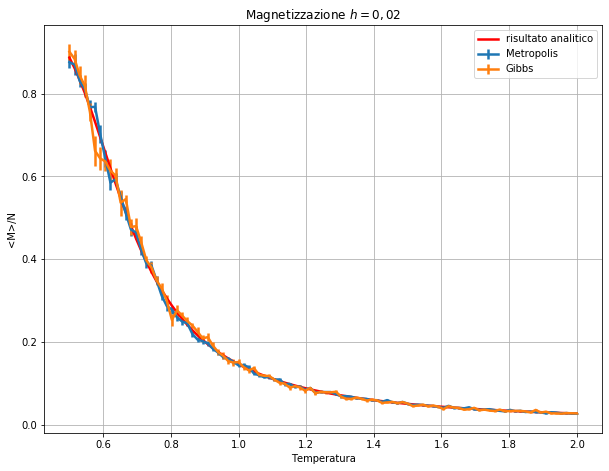

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
temp, mag, magerr = np.loadtxt('Files/Mag_metro.out', delimiter='  ', unpack=True) #metropolis
temp, magG, magGerr = np.loadtxt('Files/Mag_Gibbs.out', delimiter='  ', unpack=True) #Gibbs

plt.plot(T, M, color='red', label='risultato analitico', linewidth=2.5)
plt.errorbar(temp, mag, yerr=magerr, label='Metropolis', linewidth=2.5) #metropolis
plt.errorbar(temp, magG, yerr=magGerr, label='Gibbs', linewidth=2.5) #Gibbs

plt.title('Magnetizzazione $h=0,02$')
plt.xlabel('Temperatura')
plt.ylabel('<M>/N')
plt.legend()
plt.grid(True)

plt.show()